<a href="https://colab.research.google.com/github/JOTOR/Examples_Python/blob/master/LinearSVC_vs_SVC_and_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LinearSVC vs SVC and SGDClassifier**

**Goal:**
The goal of this notebook is to compare the performance of 3 estimators with a similar behavior. **LinearSVC** and **SGDClassifier** have the same *hinge* loss function. **SVC** is using a *linear* kernel

Developed by: jhonnatan.torres.suarez@gmail.com
___

##Data Stage

The data used in this comparison is the famous **iris** dataset, for simplicity, the dataset was filtered by its first 2 attributes/features and first 100 observations (2 classes/labels)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
plt.style.use('seaborn')

In [0]:
iris = load_iris()

In [0]:
X = iris.data[0:100,0:2]

In [0]:
y = iris.target[0:100]

##ML Stage

The 3 estimators were trained using 70 observations, the remaining 30 observations were used for testing

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y, shuffle=True)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 2)
(30, 2)
(70,)
(30,)


Observations were scaled prior to be fitted by the estimators

In [0]:
scaler = StandardScaler()
lsvc = LinearSVC(loss="hinge",random_state=1234)
svc  = SVC(kernel="linear", random_state=1234)
sgd  = SGDClassifier(loss="hinge",random_state=1234, shuffle=False)

In [0]:
pl_lsvc = make_pipeline(scaler,lsvc)
pl_svc  = make_pipeline(scaler,svc)
pl_sgd  = make_pipeline(scaler,sgd)

In [0]:
pl_lsvc.fit(X_train, y_train)
%timeit pl_lsvc.fit(X_train, y_train)

1000 loops, best of 3: 1.06 ms per loop


In [0]:
pl_svc.fit(X_train, y_train)
%timeit pl_svc.fit(X_train, y_train)

1000 loops, best of 3: 1.1 ms per loop


In [0]:
pl_sgd.fit(X_train, y_train)
%timeit pl_sgd.fit(X_train, y_train)

1000 loops, best of 3: 1.17 ms per loop


In [0]:
lsvc_predictions = pl_lsvc.predict(X_test)
svc_predictions = pl_svc.predict(X_test)
sgd_predictions = pl_sgd.predict(X_test)

In [0]:
mc_lsvc = np.where(y_test != lsvc_predictions,"red","white")
mc_svc = np.where(y_test != svc_predictions,"red","white")
mc_sdg = np.where(y_test != sgd_predictions,"red","white")

##Results & Conclusion

In terms of time, all the estimators were fitted in a similar time due to the small amount of observations (100), however, in terms of performance, the **SGDClassifier** was the only estimator that replicated the same class distribution of the original dataset

Please notice the misclassified points circled in red

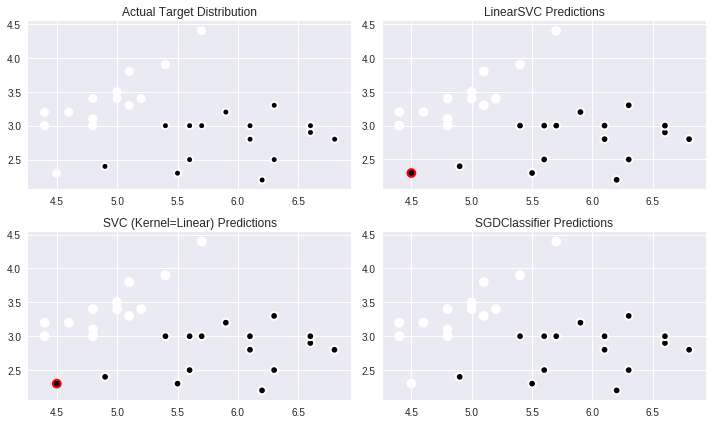

In [0]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors ="white", linewidths=2)
plt.title("Actual Target Distribution")
plt.subplot(2,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=lsvc_predictions, edgecolors=mc_lsvc, s=60, linewidths=2)
plt.title("LinearSVC Predictions")
plt.subplot(2,2,3)
plt.scatter(X_test[:,0], X_test[:,1], c=svc_predictions, edgecolors=mc_svc, s=60, linewidths=2)
plt.title("SVC (Kernel=Linear) Predictions")
plt.subplot(2,2,4)
plt.scatter(X_test[:,0], X_test[:,1], c=sgd_predictions, edgecolors=mc_sdg, s=60, linewidths=2)
plt.title("SGDClassifier Predictions")
plt.tight_layout()